In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [13]:
df = pd.read_excel('Enduro 2022 CT HT.xlsx')
df.tDateTime = pd.to_datetime(df.tDateTime, utc=True).dt.tz_convert('Asia/Taipei')
#df.set_index('tDateTime', inplace=True)
df.tDateTime = df.tDateTime.dt.date

In [14]:
df.columns

Index(['Reference', 'ItemNameType', 'StationID', 'SerialNumber', 'ProductName',
       'Version', 'CT GPS_(L1+L5) by ref', 'CT GPS_(L1+L5) by ref st',
       'HT GPS_L5) by ref', 'HT GPS_L5) by ref st', 'tDateTime', 'Temperature',
       'SO'],
      dtype='object')

In [15]:
df.head()

,Reference,ItemNameType,StationID,SerialNumber,ProductName,Version,CT GPS_(L1+L5) by ref,CT GPS_(L1+L5) by ref st,HT GPS_L5) by ref,HT GPS_L5) by ref st,tDateTime,Temperature,SO
0,397140021,15832,1,3422037674,ENDURO 2 V08.22,8.22,-0.890001,1,0.0,2,2022-06-24,-9,15955574
1,397140207,15832,1,3422037670,ENDURO 2 V08.22,8.22,0.249999,1,0.0,2,2022-06-24,-9,15955574
2,397140249,15832,3,3422037677,ENDURO 2 V08.22,8.22,-1.790000,1,0.0,2,2022-06-24,-13,15955574
3,397140258,15832,2,3422037699,ENDURO 2 V08.22,8.22,0.739999,1,0.0,2,2022-06-24,-14,15955574
4,397140396,15832,2,3422037704,ENDURO 2 V08.22,8.22,-1.450000,1,0.0,2,2022-06-24,-4,15955574


In [4]:
#df.iloc[:,7] = df.iloc[:,7].map({2:0,5:0,1:1,0:0})
#df.iloc[:,9] = df.iloc[:,9].map({2:0,5:0,1:1,0:0})

In [18]:
#ct = df[(df.ItemNameType == 15832) & (df['CT GPS_(L1+L5) by ref st']==1)]

In [33]:
ct = df[(df.ItemNameType == 15832) & (df['CT GPS_(L1+L5) by ref st'].isin([0,1]))]

In [78]:
ct.groupby('tDateTime')['CT GPS_(L1+L5) by ref'].describe().to_excel('ct.xlsx')

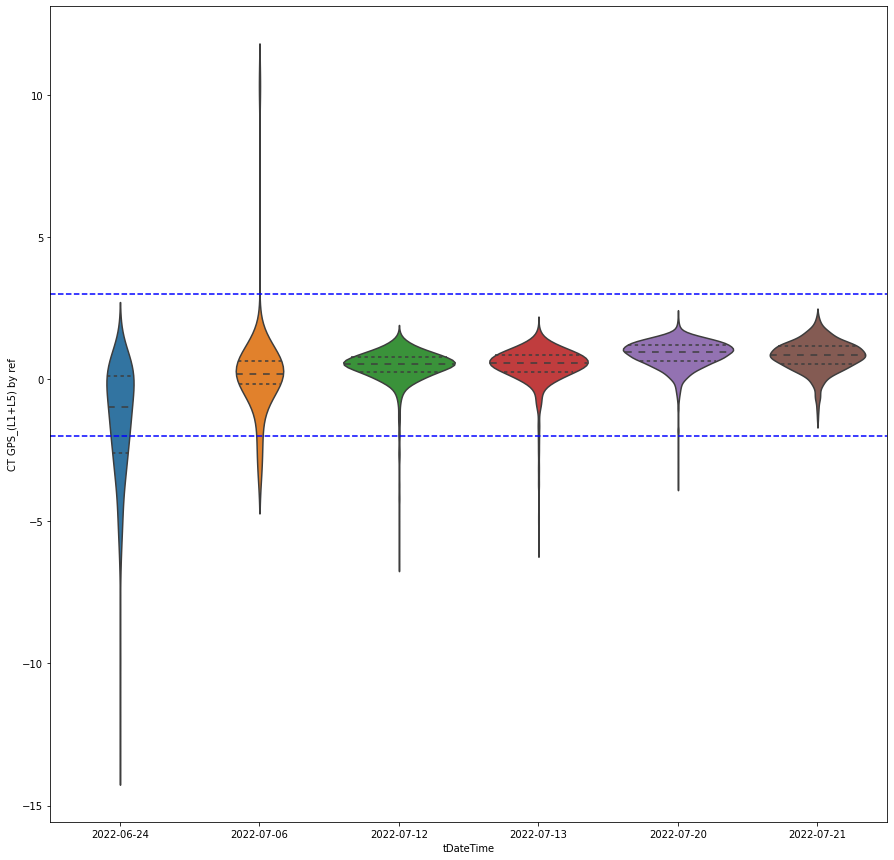

In [51]:
plt.figure(figsize=(15,15))
sns.violinplot(data=ct, x='tDateTime',y='CT GPS_(L1+L5) by ref',inner='quartile')
plt.axhline(3, ls='--', color='blue')
plt.axhline(-2, ls='--', color='blue')

In [52]:
#ct_resample = ct.resample(rule='d')['CT GPS_(L1+L5) by ref st'].agg(['sum','count'])
#ct_resample['yield'] = 100*(ct_resample['sum'] / ct_resample['count'])
#ct_resample.dropna()

In [67]:
ht = df[(df.ItemNameType == 15833) & (df['HT GPS_L5) by ref st'].isin([0,1]))]

In [68]:
ht.drop(index=8506, inplace=True)

C:\Users\wangcooper\AppData\Local\Temp\ipykernel_7544\1927012732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ht.drop(index=8506, inplace=True)


In [75]:
#ht_resample = ht.resample(rule='d')['HT GPS_L5) by ref st'].agg(['sum','count'])
#ht_resample['yield'] = 100*(ht_resample['sum'] / ht_resample['count'])
#ht_resample.dropna()

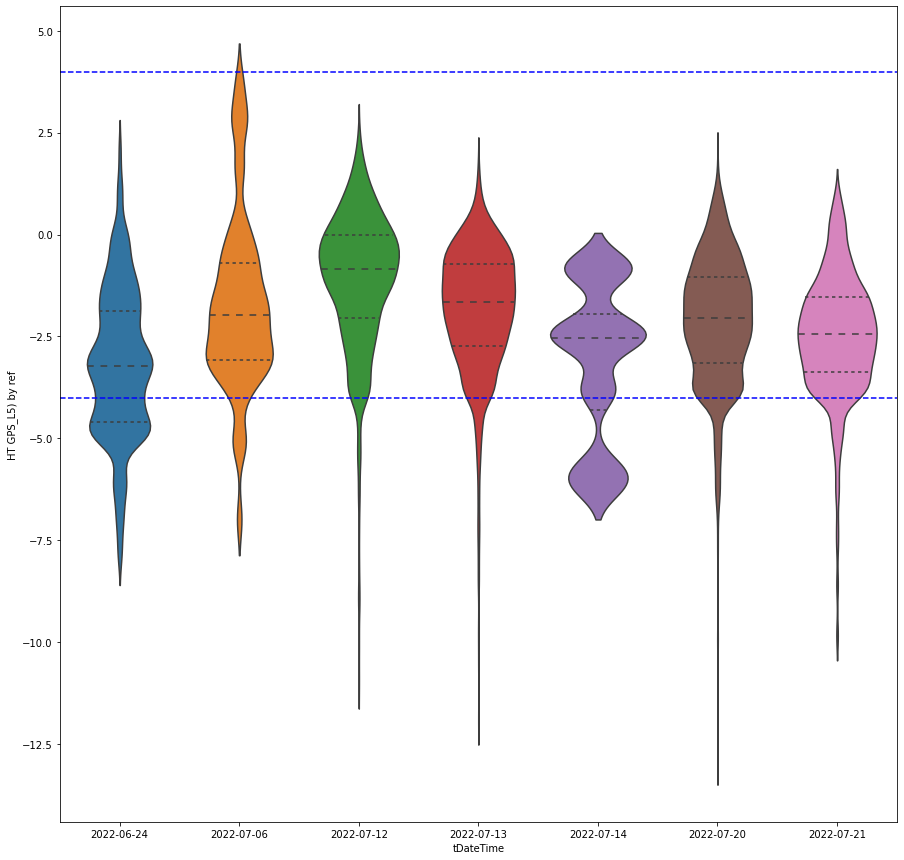

In [74]:
plt.figure(figsize=(15,15))
sns.violinplot(data=ht, x='tDateTime',y='HT GPS_L5) by ref', bw=0.2,inner='quartile')
plt.axhline(4, ls='--', color='blue')
plt.axhline(-4, ls='--', color='blue')

In [77]:
ht.groupby('tDateTime')['HT GPS_L5) by ref'].describe().to_excel('ht.xlsx')